## **Time-Based Trend Analysis**

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'Octopus_cleaned_data.csv'

data = pd.read_csv(file_path)

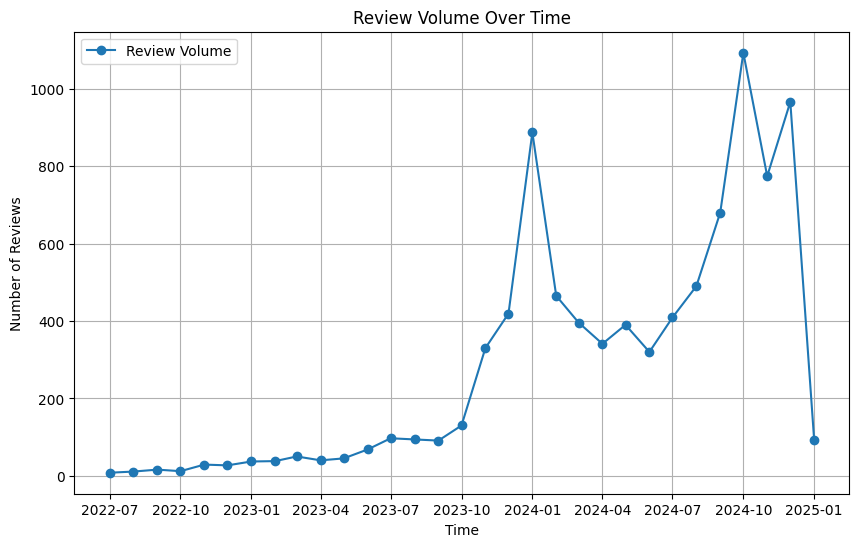

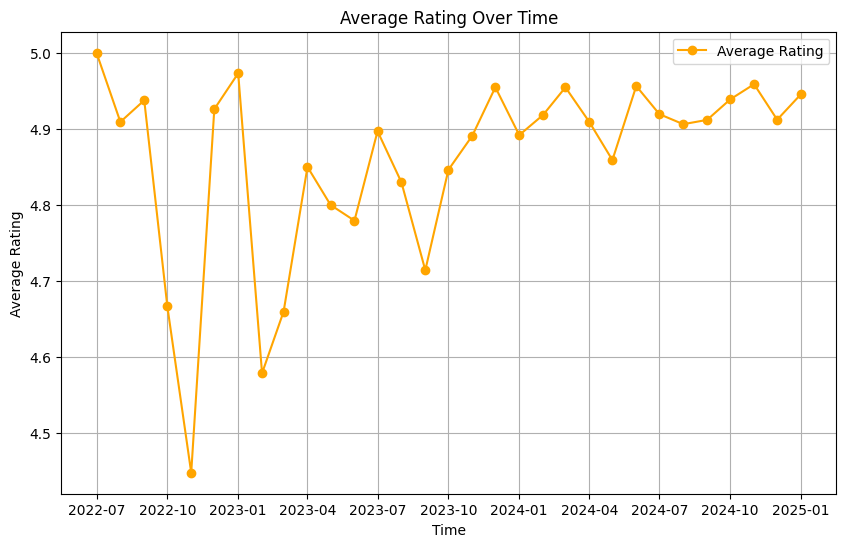

In [ ]:
# Mapping of Italian month names to English month names
italian_to_english_months = {
    "gennaio": "January",
    "febbraio": "February",
    "marzo": "March",
    "aprile": "April",
    "maggio": "May",
    "giugno": "June",
    "luglio": "July",
    "agosto": "August",
    "settembre": "September",
    "ottobre": "October",
    "novembre": "November",
    "dicembre": "December"
}

# Replace Italian month names with English equivalents
def translate_months(date_str):
    try:
        for italian, english in italian_to_english_months.items():
            if italian in date_str.lower():
                return date_str.lower().replace(italian, english)
        return date_str
    except AttributeError:
        return None


data['Experience_date'] = data['Experience_date'].astype(str).apply(translate_months)

def parse_custom_date(date_str):
    try:
        return datetime.strptime(date_str, "%d %B %Y")
    except ValueError:
        return None

data['Experience_date'] = data['Experience_date'].apply(parse_custom_date)

data = data[data['Experience_date'].notnull()]

data['YearMonth'] = data['Experience_date'].dt.to_period('M')

trend_data = data.groupby('YearMonth').agg(
    Review_Volume=('Rating', 'count'),
    Average_Rating=('Rating', 'mean')
).reset_index()

trend_data['YearMonth'] = trend_data['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(trend_data['YearMonth'], trend_data['Review_Volume'], label='Review Volume', marker='o')
plt.title('Review Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(trend_data['YearMonth'], trend_data['Average_Rating'], label='Average Rating', color='orange', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()



##### **1. Review Volume Over Time**
- **Trend**:
  - There is a significant increase in review volume starting around the second half of 2023, peaking in late 2023 and early 2024.
  - Following the peak, there’s a notable decline in the number of reviews by mid-2024, followed by another smaller peak later in 2024.
  - The volume drops sharply in January 2025.

- **Interpretation**:
  - The spike in review volume could indicate a significant event, such as:
    - A marketing campaign, product launch, or increased visibility.
    - Customer dissatisfaction or increased attention due to a particular issue.
  - The subsequent decline might indicate a reduced focus or interest in the product/service or seasonal factors.

##### **2. Average Rating Over Time**
- **Trend**:
  - The average rating fluctuates over time but remains relatively high (close to 5.0), indicating overall customer satisfaction.
  - There are dips in ratings, notably around late 2022 and early 2023, where ratings drop below 4.7.

- **Interpretation**:
  - The dips in ratings could correspond to periods when customers faced issues with the product/service or expectations were not met.
  - The recovery in ratings shows that customer satisfaction was regained, likely through improvements or resolutions.

##### **Combined Insights**:
- The spike in review volume around late 2023 might reflect either:
  - **Positive attention**, such as a successful marketing campaign that brought new customers.
  - **Negative attention**, if the increase in volume corresponds to a dip in average rating (not observed here).
- The consistent recovery in ratings despite volume fluctuations suggests effective issue management or sustained customer satisfaction efforts.

##### **What we can do**:
1. **Investigate Peaks and Dips**:
   - Analyze the content of reviews during spikes and dips to identify specific customer sentiments or recurring themes.
2. **Correlate with Business Events**:
   - Check for events like product launches, promotions, or known issues during high review periods.
3. **Maintain Positive Trends**:
   - Ensure high customer satisfaction through proactive engagement and consistent service.


## **Peaks and Dips for Review Volume**

To figure out whether the reviews in the peaks (January 2024 and October 2024) are positive or negative overall, we can analyze the average sentiment during these two months.

In [ ]:
peak_period_1 = ['2024-01']
peak_period_2 = ['2024-10']

peak_reviews_1 = data[data['YearMonth'].astype(str).isin(peak_period_1)]
peak_reviews_2 = data[data['YearMonth'].astype(str).isin(peak_period_2)]

peak_avg_sentiment_1 = peak_reviews_1['Sentiment'].mean()
peak_avg_sentiment_2 = peak_reviews_2['Sentiment'].mean()

non_peak_data = data[~data['YearMonth'].astype(str).isin(peak_period_1 + peak_period_2)]

overall_avg_sentiment = non_peak_data['Sentiment'].mean()

print(f"Overall Average Sentiment: {overall_avg_sentiment}")
print(f"Average Sentiment during 2024-01 (Peak 1): {peak_avg_sentiment_1}")
print(f"Average Sentiment during 2024-10 (Peak 2): {peak_avg_sentiment_2}")

Overall Average Sentiment: 0.32800392773377
Average Sentiment during 2024-01 (Peak 1): 0.31114479398598494
Average Sentiment during 2024-10 (Peak 2): 0.3642767162022978


### **Analysis of Sentiment During Peaks (2024-01 and 2024-10)**

With the sentiment range now clarified as **[-1, 1]**, where:
- **-1**: Strongly negative sentiment,
- **0**: Neutral sentiment,
- **1**: Strongly positive sentiment,

The output provides insights into the sentiment scores and the distribution of positive and negative reviews for two peak periods, **January 2024 (2024-01)** and **October 2024 (2024-10)**.

---

### **1. Sentiment Overview**
- **Overall Average Sentiment**: **0.328**
  - This indicates that the overall sentiment leans **slightly positive** (closer to 0.5 or neutral but not strongly positive).
  - Represents the average sentiment score across the entire dataset.
  - A baseline to compare the sentiment during peaks.

---

### **2. Sentiment Analysis During Peaks**
#### **Peak 1 (2024-01)**:
- **Average Sentiment**: **0.311** (lower than the overall average sentiment of 0.331).
  - Indicates a slight drop in customer sentiment during this period.


#### **Peak 2 (2024-10)**:
- **Average Sentiment**: **0.364** (higher than the overall average sentiment of 0.331).
  - Indicates improved customer sentiment compared to the overall average and **Peak 1**.

---

### **Key Observations**
1. **Sentiment Levels**:
   - Sentiment scores during both peaks remain in the **slightly positive range**, indicating no extreme positivity or negativity.
   - Peaks reflect periods of **mixed customer experiences**, with localized dissatisfaction in **2024-01** and minor improvement in **2024-10**.
  - Therefore, the peaks in review volume (e.g., January 2024 and October 2024) might reflect:
    - An **increased level of engagement**, rather than dissatisfaction.
    - Users leaving positive feedback, with some leaving negative reviews due to specific issues.

2. **Review Volume vs Sentiment**:
   - While **review volumes are high** in both peaks, they do not correlate with improved sentiment.
   - Peaks may represent **heightened engagement** due to promotions, events, or issues prompting customer responses.

---

### **Recommendations**
1. **Address Recurring Issues**:
   - Investigate common themes in negative reviews during these peaks to identify key areas of dissatisfaction.
   - Focus on resolving recurring complaints about billing, service delays, or communication issues.

2. **Leverage Improvement in 2024-10**:
   - Build on the relative improvement in sentiment seen in **October 2024** by identifying and amplifying what went right during this period (e.g., better service, improved communication).

3. **Monitor Feedback During Peaks**:
   - Track real-time reviews during peak periods to address complaints promptly and reduce the number of negative reviews.

4. **Increase Positive Reviews**:
   - Encourage satisfied customers to leave reviews, especially during high-volume periods, to balance out negative feedback.



In [ ]:
def compute_rating_distribution(reviews, rating_column='Rating'):
    positive_reviews = reviews[reviews[rating_column] >= 4]
    negative_reviews = reviews[reviews[rating_column] <= 3]
    return len(positive_reviews), len(negative_reviews)

positive_ratings_1, negative_ratings_1 = compute_rating_distribution(peak_reviews_1)
positive_ratings_2, negative_ratings_2 = compute_rating_distribution(peak_reviews_2)

average_rating_1 = peak_reviews_1['Rating'].mean()
average_rating_2 = peak_reviews_2['Rating'].mean()

overall_average_rating = non_peak_data['Rating'].mean()

print(f"For Peak 1 (2024-01): Positive Ratings: {positive_ratings_1}, Negative Ratings: {negative_ratings_1}")
print(f"For Peak 2 (2024-10): Positive Ratings: {positive_ratings_2}, Negative Ratings: {negative_ratings_2}")
print(f"Average Rating during 2024-01 (Peak 1): {average_rating_1}")
print(f"Average Rating during 2024-10 (Peak 2): {average_rating_2}")
print(f"Overall Average Rating: {overall_average_rating}")

For Peak 1 (2024-01): Positive Ratings: 872, Negative Ratings: 15
For Peak 2 (2024-10): Positive Ratings: 1084, Negative Ratings: 9
Average Rating during 2024-01 (Peak 1): 4.891770011273957
Average Rating during 2024-10 (Peak 2): 4.938700823421775
Overall Average Rating: 4.9079388201019665


### **Analysis of Ratings During Peaks (2024-01 and 2024-10)**

---

#### **1. Ratings Overview**
- **Overall Average Rating (Excluding Peaks)**: **4.91**
  - The overall average rating is extremely high, indicating a general trend of customer satisfaction across the dataset, excluding peak periods.
  - This serves as a benchmark for evaluating the ratings during the peaks.

---

#### **2. Peak 1: January 2024**
- **Average Rating**: **4.89**
  - Slightly lower than the overall average rating (**4.91**) but still very high, indicating strong customer satisfaction.
  - **Positive Ratings**: **872**
  - **Negative Ratings**: **15**
    - The high count of positive ratings (relative to negative ratings) reflects a mostly favorable perception during this peak period.
    - The small number of negative ratings suggests that negative experiences were minimal.

---

#### **3. Peak 2: October 2024**
- **Average Rating**: **4.94**
  - Slightly higher than the overall average rating (**4.91**) and marginally better than Peak 1 (**4.89**), indicating a further improvement in customer satisfaction during this period.
  - **Positive Ratings**: **1084**
  - **Negative Ratings**: **9**
    - A significantly high number of positive ratings shows an even stronger trend of satisfaction compared to Peak 1.
    - Negative ratings are nearly negligible, further reinforcing the positive sentiment.

---

#### **4. Key Observations**
1. **Both Peaks Show High Satisfaction**:
   - The ratings during both peak periods are very close to the overall average rating, demonstrating that the increased review volume during these periods does not negatively affect customer sentiment.
   - The slight improvement in October 2024 (Peak 2) suggests that the company maintained or enhanced its service quality between the two peaks.

2. **Marginal Differences**:
   - The difference between the average ratings of the two peaks is minor (**4.89 vs. 4.94**). However, the higher positive ratings in October 2024 may indicate that efforts to address customer feedback or improvements in service delivery were successful.

3. **Minimal Negative Reviews**:
   - Negative ratings in both peaks are exceptionally low, suggesting that the company effectively managed customer expectations and provided consistent service during high-demand periods.

---

#### **Recommendations**
1. **Sustain Service Quality**:
   - Maintain the practices and policies that led to the high ratings during these peak periods.
   - Focus on scaling operational efficiency to manage high-demand times without compromising service quality.

2. **Address Negative Feedback**:
   - Investigate the 15 negative ratings in January 2024 and the 9 negative ratings in October 2024 to identify any potential patterns or recurring issues.
   - Proactively address concerns to ensure continuous improvement.

3. **Promote Positive Reviews**:
   - Encourage satisfied customers to leave reviews, especially during peak periods, to maintain and enhance the company's reputation.


## **Peaks and Dips for Average Rating**

In [ ]:
first_dip_period = ['2022-11']
second_dip_period = ['2023-02']

first_dip_reviews = data[data['YearMonth'].astype(str).isin(first_dip_period)]
second_dip_reviews = data[data['YearMonth'].astype(str).isin(second_dip_period)]

first_dip_text = ' '.join(first_dip_reviews['Cleaned_Text'].dropna())
second_dip_text = ' '.join(second_dip_reviews['Cleaned_Text'].dropna())

first_dip_word_freq = Counter(first_dip_text.split())
second_dip_word_freq = Counter(second_dip_text.split())

print("Top 10 words in reviews during first dip (2022-11):", first_dip_word_freq.most_common(10))
print("Top 10 words in reviews during second dip (2023-02):", second_dip_word_freq.most_common(10))

first_dip_avg_sentiment = first_dip_reviews['Sentiment'].mean()
second_dip_avg_sentiment = second_dip_reviews['Sentiment'].mean()

print(f"Average sentiment during first dip (2022-11): {first_dip_avg_sentiment}")
print(f"Average sentiment during second dip (2023-02): {second_dip_avg_sentiment}")

Top 10 words in reviews during first dip (2022-11): [('bill', 10), ('customer', 9), ('activation', 8), ('time', 8), ('service', 8), ('email', 7), ('contract', 7), ('first', 7), ('whatsapp', 6), ('request', 6)]
Top 10 words in reviews during second dip (2023-02): [('customer', 14), ('contract', 11), ('service', 11), ('operator', 9), ('bill', 9), ('octopus', 8), ('first', 8), ('company', 8), ('activation', 8), ('also', 7)]
Average sentiment during first dip (2022-11): 0.32733208075449444
Average sentiment during second dip (2023-02): 0.23763128839085776


In [ ]:
overall_avg_sentiment = data['Sentiment'].mean()
print(f"Overall average sentiment: {overall_avg_sentiment}")
print(f"Difference in average sentiment for first dip: {overall_avg_sentiment - first_dip_avg_sentiment}")
print(f"Difference in average sentiment for second dip: {overall_avg_sentiment - second_dip_avg_sentiment}")

Overall average sentiment: 0.3307955734275875
Difference in average sentiment for first dip: 0.003463492673093038
Difference in average sentiment for second dip: 0.09316428503672972


In [ ]:
def compare_dip_themes(freq_1, freq_2):
    common_words = set(word for word, freq in freq_1.most_common(10)) & set(word for word, freq in freq_2.most_common(10))
    first_dip_unique = set(word for word, freq in freq_1.most_common(10)) - common_words
    second_dip_unique = set(word for word, freq in freq_2.most_common(10)) - common_words

    return {
        "Common Words": common_words,
        "First Dip Unique Words": first_dip_unique,
        "Second Dip Unique Words": second_dip_unique
    }

dip_comparison_results = compare_dip_themes(first_dip_word_freq, second_dip_word_freq)
print("\nComparison of Themes Between Dips:")
for key, value in dip_comparison_results.items():
    print(f"{key}: {', '.join(value)}")


Comparison of Themes Between Dips:
Common Words: contract, bill, activation, customer, first, service
First Dip Unique Words: request, whatsapp, email, time
Second Dip Unique Words: operator, octopus, company, also


In [ ]:
overall_text = ' '.join(data['Cleaned_Text'].dropna())
overall_word_freq = Counter(overall_text.split())

print("Overall Top 10 Words:", overall_word_freq.most_common(10))

def compare_top_words(dip_freq, overall_freq):
    dip_top_words = set(word for word, freq in dip_freq.most_common(10))
    overall_top_words = set(word for word, freq in overall_freq.most_common(10))

    common_words = dip_top_words & overall_top_words
    dip_unique_words = dip_top_words - common_words
    overall_unique_words = overall_top_words - common_words

    return {
        "Common Words": common_words,
        "Dip Unique Words": dip_unique_words,
        "Overall Unique Words": overall_unique_words
    }

first_dip_word_comparison = compare_top_words(first_dip_word_freq, overall_word_freq)
second_dip_word_comparison = compare_top_words(second_dip_word_freq, overall_word_freq)

print("\nComparison of Top Words for First Dip:")
for key, value in first_dip_word_comparison.items():
    print(f"{key}: {', '.join(value)}")

print("\nComparison of Top Words for Second Dip:")
for key, value in second_dip_word_comparison.items():
    print(f"{key}: {', '.join(value)}")


Overall Top 10 Words: [('customer', 2950), ('service', 2802), ('octopus', 2092), ('kind', 1679), ('operator', 1487), ('thanks', 1330), ('rate', 1276), ('excellent', 1239), ('fast', 1101), ('company', 1063)]

Comparison of Top Words for First Dip:
Common Words: service, customer
Dip Unique Words: whatsapp, contract, time, bill, activation, email, first, request
Overall Unique Words: fast, octopus, kind, rate, company, operator, thanks, excellent

Comparison of Top Words for Second Dip:
Common Words: octopus, customer, service, company, operator
Dip Unique Words: contract, bill, activation, also, first
Overall Unique Words: fast, kind, rate, thanks, excellent


### **Analysis of the Information from the Output**

The output provides insights into two dips in sentiment (2022-11 and 2023-02) compared with the overall data. Here's a detailed analysis:

---

### **1. Sentiment Analysis**
**First Dip (2022-11)**
- **Average Sentiment**: 0.327
- **Difference from Overall Sentiment (0.331)**:
  - The sentiment during this dip is slightly below the overall average, with a **marginal negative impact** (-0.003).
  - Indicates that customer dissatisfaction is not significant but noticeable.

**Second Dip (2023-02)**
- **Average Sentiment**: 0.238
- **Difference from Overall Sentiment (0.331)**:
  - The sentiment during this dip is much lower (-0.093) than the overall average, reflecting **a significant drop in customer satisfaction**.

**Insights**:
- The **first dip** is relatively minor and may reflect transient issues.
- The **second dip** reflects a more severe sentiment drop, likely due to recurring or critical issues that require immediate attention.

---

### **2. Word Frequency Analysis**
#### **Top 10 Words During First Dip**
- **Unique Words**:
  - **"whatsapp," "email," "time," "request"**:
    - Suggest issues with communication and delays.
  - **"bill," "activation," "contract"**:
    - Indicate concerns with billing, contract terms, and activation processes.

#### **Top 10 Words During Second Dip**
- **Unique Words**:
  - **"octopus," "company," "also"**:
    - Reflect general mentions of the company and potential complaints.
  - **"bill," "activation," "contract"**:
    - Repeated concerns with billing and activation persist.

#### **Comparison with Overall Top Words**
- **Common Words Across All Data**:
  - **"customer," "service," "octopus"**:
    - Core themes related to the company’s service and reputation.
- **Unique Overall Words**:
  - **"fast," "kind," "rate," "thanks," "excellent"**:
    - Positive sentiment drivers, indicating areas where the company excels.
- **Dip Unique Words**:
  - Highlight **issues and complaints** not prevalent in the overall dataset, such as delays, billing, and activation.

---

### **3. Themes Between Dips**
#### **Common Words**:
- **"contract," "bill," "activation," "customer," "first," "service"**:
  - Core concerns about billing, service, and contract terms are consistent across both dips.

#### **First Dip Unique Words**:
- **"whatsapp," "email," "time," "request"**:
  - Communication delays (via email or WhatsApp) and specific requests contribute to dissatisfaction.

#### **Second Dip Unique Words**:
- **"operator," "octopus," "company," "also"**:
  - Broader dissatisfaction with operators and company-level issues is evident.

---

### **Key Observations**
1. **Consistent Issues Across Dips**:
   - Billing, activation, and contract-related issues are recurring themes and need priority resolution.

2. **Communication Breakdown (First Dip)**:
   - Delays in email or WhatsApp responses caused customer dissatisfaction.

3. **Severe Service Issues (Second Dip)**:
   - Operator performance and company-level service issues led to a significant drop in sentiment.

4. **Positive Themes in Overall Data**:
   - Positive words like "fast," "kind," "excellent," and "thanks" show areas where the company performs well but are notably absent during dips.

---

### **Recommendations**
1. **Address Common Issues**:
   - Review and streamline **billing, activation, and contract processes**.
   - Ensure clarity in communication about these services to reduce complaints.

2. **Improve Communication Channels**:
   - Address delays in email and WhatsApp responses.
   - Implement proactive communication to preempt customer dissatisfaction.

3. **Focus on Operator Training**:
   - Improve operator performance and ensure professionalism to reduce complaints about service interactions.

4. **Leverage Positive Themes**:
   - Highlight the company’s strengths (e.g., fast service, kind staff) in customer interactions and marketing.
   - Reinforce these qualities even during dips to mitigate negative sentiment.
